In [1]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [2]:
import random

In [3]:
def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).strip()

In [4]:
def adj1():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [5]:
for i in range(5):
    print(adj())

好看的
蓝色的
小小的
好看的
好看的


In [6]:
for i in range(5):
    print(adj1())

好看的
好看的
小小的
好看的
蓝色的


In [7]:
def adj_star():
    return random.choice([lambda :'', lambda : adj()+ adj_star()])()

In [8]:
for i in range(5):
    print(adj_star())



蓝色的
蓝色的



In [9]:
def create_grammer(grammar_str,split='=>',line_split = '\n'):
    """
    """
    grammer = {}
    for line in grammar_str.split(line_split):
        if not line.split():
            continue
        exp, stmt = line.split(split)
        grammer[exp.strip()] = [s.split() for  s in stmt.split('|') ]
    return grammer

In [10]:
grammer = create_grammer(simple_grammar)
grammer

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [11]:
def generate(gram, target):
    if target not in gram:
        return target
    expaned = [generate(gram, t) for t in random.choice(gram[target])]
    
    return ''.join([e if e !='/n' else '\n' for e in expaned if e != 'null'])

In [12]:
generate(grammer,target='sentence')

'一个小猫看见一个桌子'

In [13]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [14]:
for i in range(10):
    print(generate(create_grammer(human,split='=',line_split = '\n'),target='human'))

俺想找点乐子
我们找找乐子
俺想找点乐子
我想找点乐子
俺想找点玩的
我们找找玩的
我想找点玩的
我找找玩的
我想找点玩的
我想找点玩的


In [15]:
 exp, stmt = "human = 自己 寻找 活动".split("=")

In [16]:
stmt

' 自己 寻找 活动'

In [17]:
temp = [s.split() for  s in stmt.split('|') ]
temp

[['自己', '寻找', '活动']]

In [18]:
[s.split() for  s in stmt.split() ]

[['自己'], ['寻找'], ['活动']]

In [19]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [20]:
for i in range(10):
    print(generate(create_grammer(programming,split='=>'), target='stmt'))

coursestudent2=name3
if(info2){
....databasecourse1=student2}
infoinfo1=coursecourse1
if(course1){
....if(databasecourse3){
....while(coursecourse1){
....if(course1){
....while(info2){
....while(studentinfo1){
....if(student3){
....name1=name2}}}}}}}
coursestudent2=info3
if(studentname2){
....databaseinfo3=student2}
course2=name2
student1=student1
if(course1){
....if(studentdatabase3){
....database2=namename2}}
if(info3){
....while(name1){
....while(name1){
....coursedatabase1=course2}}}


In [21]:
import pandas as pd

In [22]:
file = "../../data/datasource-master/sqlResult_1558435.csv"

In [23]:
content = pd.read_csv(file,encoding='gb18030')
content.shape

(89611, 7)

In [24]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [25]:
content.columns

Index(['id', 'author', 'source', 'content', 'feature', 'title', 'url'], dtype='object')

In [26]:
articles = content.content.tolist()
len(articles)

89611

In [27]:
import re

In [28]:
def data_preprocessinng(content):
    return ''.join(re.findall('\w+',content))

In [29]:
content['content']=content['content'].apply(lambda x: data_preprocessinng(str(x)))

In [30]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车新华社记者张立云摄,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,原标题44岁女子跑深圳约会网友被拒暴雨中裸身奔走深圳交警微博称昨日清晨交警发现有一女子赤裸上...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [31]:
from collections import Counter

In [32]:
all_articles = ''.join(content.content.tolist())

In [33]:
import jieba

In [34]:
all_words_list = jieba.lcut(all_articles)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acer9527\AppData\Local\Temp\jieba.cache
Loading model cost 0.774 seconds.
Prefix dict has been built succesfully.


In [35]:
counter = Counter(all_words_list)

In [36]:
counter.most_common(10)

[('的', 703716),
 ('n', 378454),
 ('在', 263597),
 ('月', 189330),
 ('日', 166267),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123105),
 ('了', 121939),
 ('是', 100914)]

In [37]:
frequences = [f for w,f in counter.most_common(100)]
log_frequences = [np.log(f) for w,f in counter.most_common(100)]
x = [i for i in range(100)]

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlibt inline

UsageError: Line magic function `%matplotlibt` not found.


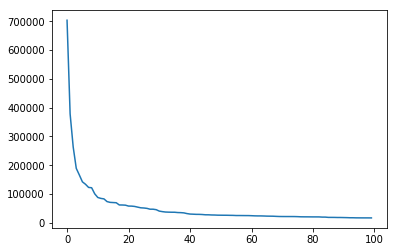

In [39]:
plt.plot(x,frequences)

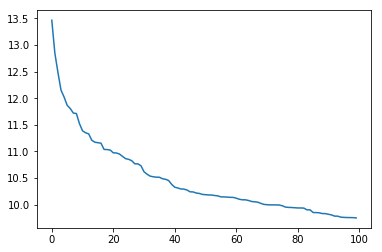

In [40]:
plt.plot(x,log_frequences)

In [41]:
sum(counter.values())

17522839

In [42]:

def prob_1(word,words_freq_counter):
    return counter[word] / sum(words_freq_counter.values())

In [43]:
prob_1('我们',counter)

0.0011403403295550452

In [44]:
all_words_list[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [45]:
prob_1('吹牛',counter)

5.706837801796843e-07

In [46]:
all_words=[str(word) for word in all_words_list]

In [47]:
# 这种做法没有考虑 在文本提出是已经把所有的文本数据拼接场一条文本了，
# 这就有许多原本没有连续的词组成了2元词组（第一个词在前一个文本末尾，第二个词在下一文本的开始）的情况
all_word_2gram = [''.join(all_words_list[i:i+2]) for i in range(len(all_words_list[:-2])) ]

In [48]:
all_word_2gram[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [49]:
import pickle

In [54]:
# with open('../data/all_word_1gram.dat','wb') as f:   
#     #以写模式打开二进制文件
#     pickle.dump(dicts,f)

In [50]:
counter_2gram=Counter(all_word_2gram)
dicts_2gram = dict(counter_2gram)

In [51]:
counter_2gram.most_common(10)

[('n新华社', 73453),
 ('2017年', 61477),
 ('外代二线', 61301),
 ('日n', 52255),
 ('新华社照片', 50401),
 ('5月', 37957),
 ('4月', 34550),
 ('新华社记者', 30864),
 ('２０', 27166),
 ('日在', 27154)]

In [52]:
sum(counter_2gram.values())

17522837

In [53]:
# with open('../data/all_words_2gram.dat','wb') as f:   
#     #以写模式打开二进制文件
#     pickle.dump(dicts_2gram,f)

In [57]:
# with open('../data/all_words.txt','w') as f:  
#     f.write(' '.join(all_words))

In [54]:
def prob_2(word1,word2,Vocabulary_counter):
    if word1+word2 in Vocabulary_counter:
        return Vocabulary_counter[word1+word2] / sum(Vocabulary_counter.values())
    return 1/sum(Vocabulary_counter.values())

In [55]:
prob_2('我们', '在', counter_2gram)

3.070279087798397e-05

In [56]:
prob_2('在', '吃饭',counter_2gram)

2.853419226578436e-07

In [57]:
prob_2('在', '打球', counter_2gram)

4.5654707625254973e-07

In [58]:

def get_probablity(sentence,Vocabulary_counter):
    """ get the probablity by two gram
    """
    
    default_probility = 1 / sum(Vocabulary_counter.values())
    
    # extract words and number from the sentence
    clearn_data = data_preprocessinng(sentence)
    
    # token use jieba
    words_list = jieba.lcut(clearn_data)
    
    sentencece_prob = 1
    
    for i in range(len(words_list)-1):

        probablity = prob_2(words_list[i], words_list[i+1],Vocabulary_counter)
        
        if probablity == 0:
            probablity = default_probility
            
        sentencece_prob *= probablity
    
    return sentencece_prob

In [60]:
get_probablity('我今天抽奖抽到100万元',counter_2gram)

1.7650841459293196e-33

In [61]:
get_probablity('我今天买体育彩票中到10元',counter_2gram)

6.901904682421091e-41

In [ ]:
# 为啥10块钱的概率更低呢？？？？

In [62]:
for sen in [generate(gram=grammer, target='sentence') for _ in range(10)]:
    print('sentence: {} with prob: {}'.format(sen, get_probablity(sen, counter_2gram)))

sentence: 一个篮球看见一个好看的女人 with prob: 3.24990586847936e-40
sentence: 这个好看的好看的小猫听着一个小小的小小的女人 with prob: 1.1275422882964387e-70
sentence: 一个好看的小猫看着一个女人 with prob: 4.775371888377836e-40
sentence: 这个蓝色的篮球看着一个小猫 with prob: 7.94513552030456e-41
sentence: 这个桌子坐在一个篮球 with prob: 6.364049749054255e-29
sentence: 这个篮球听着这个蓝色的好看的小小的蓝色的桌子 with prob: 5.765035199622463e-78
sentence: 一个蓝色的女人看见一个桌子 with prob: 3.385318612999333e-40
sentence: 一个好看的女人看着这个小小的好看的女人 with prob: 1.917911682959835e-57
sentence: 一个桌子坐在一个小猫 with prob: 6.364049749054255e-29
sentence: 这个蓝色的蓝色的好看的好看的小小的小小的小猫听着一个蓝色的桌子 with prob: 1.1203628012545565e-108


In [64]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1, counter_2gram), get_probablity(s2, counter_2gram)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 3.4947370316323536e-59
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 2.7957896253058823e-59
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.648781289690389e-34
---- 真是一只好看的小猫 with probility 8.145983678789447e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.457002398789628e-20
---- 今晚火锅去吃我 with probility 5.515509782513688e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.858603440209477e-22
---- 养乐多绿来一杯 with probility 3.2568005130429914e-15


In [68]:
Self_introduction_gram = """
self_info = 姓名 程度副词* 擅长 特点
姓名 = 华晨宇 | 毛不易
程度副词* = null | 程度副词 程度副词*
程度副词 = 很 | 非常 | 特别 | 极其
擅长 = 喜欢 | 善于 | 擅长
特点 = 作词 | 作曲 | 喝酒 | 怼人
"""

In [69]:
def generate_n(grammar, target, n):
    """产生n条语句"""
    result = []
    for i in range(n):
        sentence = generate(gram=grammar, target=target)
        result.append(sentence)
        
    return result


In [70]:
self_definition_grammer = create_grammer(Self_introduction_gram,split='=')
self_definition_grammer

{'self_info': [['姓名', '程度副词*', '擅长', '特点']],
 '姓名': [['华晨宇'], ['毛不易']],
 '程度副词*': [['null'], ['程度副词', '程度副词*']],
 '程度副词': [['很'], ['非常'], ['特别'], ['极其']],
 '擅长': [['喜欢'], ['善于'], ['擅长']],
 '特点': [['作词'], ['作曲'], ['喝酒'], ['怼人']]}

In [72]:
generate_n(self_definition_grammer,'self_info',10)

['华晨宇非常非常极其非常喜欢喝酒',
 '毛不易喜欢作词',
 '毛不易喜欢作词',
 '华晨宇极其特别喜欢作词',
 '华晨宇非常非常极其非常很喜欢喝酒',
 '毛不易非常善于作曲',
 '华晨宇特别喜欢作词',
 '毛不易善于作词',
 '毛不易很非常特别喜欢喝酒',
 '华晨宇非常善于作曲']

# 使用新数据源完成语言模型的训练

In [73]:
%%time
contences_list = []
with open("../data/train.txt",'r+',encoding='utf8') as f:
    lines = f.readlines()
    for line in lines:
        try:
            f1,f2,f3,f4 = line.split('++$++')
            contences_list.append([f1,f2,f3,f4])
        except:
            print(line)
            continue

Wall time: 196 ms


In [74]:
len(contences_list)

12889

In [75]:
contences_list[:5]

[['0 ',
  ' disability-insurance ',
  ' 法律要求残疾保险吗？ ',
  ' Is  Disability  Insurance  Required  By  Law?\n'],
 ['1 ',
  ' life-insurance ',
  ' 债权人可以在死后人寿保险吗？ ',
  ' Can  Creditors  Take  Life  Insurance  After  Death?\n'],
 ['2 ',
  ' renters-insurance ',
  ' 旅行者保险有租赁保险吗？ ',
  ' Does  Travelers  Insurance  Have  Renters  Insurance?\n'],
 ['3 ',
  ' auto-insurance ',
  ' 我可以开一辆没有保险的新车吗？ ',
  ' Can  I  Drive  A  New  Car  Home  Without  Insurance?\n'],
 ['4 ',
  ' life-insurance ',
  ' 人寿保险的现金转出价值是否应纳税？ ',
  ' Is  The  Cash  Surrender  Value  Of  Life  Insurance  Taxable?\n']]

In [76]:
import pandas as pd

In [77]:
df_data = pd.DataFrame(contences_list,columns=['No','categ','desc_zn','desc_en'])
df_data.shape

(12889, 4)

In [78]:
df_data.head()

,No,categ,desc_zn,desc_en
0,0,disability-insurance,法律要求残疾保险吗？,Is Disability Insurance Required By Law?\n
1,1,life-insurance,债权人可以在死后人寿保险吗？,Can Creditors Take Life Insurance After ...
2,2,renters-insurance,旅行者保险有租赁保险吗？,Does Travelers Insurance Have Renters In...
3,3,auto-insurance,我可以开一辆没有保险的新车吗？,Can I Drive A New Car Home Without In...
4,4,life-insurance,人寿保险的现金转出价值是否应纳税？,Is The Cash Surrender Value Of Life In...


In [79]:
df_data.columns

Index(['No', 'categ', 'desc_zn', 'desc_en'], dtype='object')

In [80]:
df_data.drop(['No'],axis=1,inplace=True)

In [81]:
df_data.categ.value_counts()

 life-insurance                 3328
 medicare-insurance             1770
 auto-insurance                 1659
 health-insurance               1542
 home-insurance                 1340
 renters-insurance               800
 disability-insurance            751
 annuities                       611
 retirement-plans                525
 long-term-care-insurance        427
 critical-illness-insurance      107
 other-insurance                  29
Name: categ, dtype: int64

In [82]:
topics_list = df_data.categ.value_counts().index.tolist()

In [83]:
topics_list

[' life-insurance ',
 ' medicare-insurance ',
 ' auto-insurance ',
 ' health-insurance ',
 ' home-insurance ',
 ' renters-insurance ',
 ' disability-insurance ',
 ' annuities ',
 ' retirement-plans ',
 ' long-term-care-insurance ',
 ' critical-illness-insurance ',
 ' other-insurance ']

In [84]:
topics_list = [x.strip() for x in topics_list]

In [85]:
df_data['categ'] = df_data['categ'].apply(lambda x: x.strip())

In [86]:
grams= {'life-insurance':None,
 'medicare-insurance':None,
 'auto-insurance':None,
 'health-insurance':None,
 'home-insurance':None,
 'renters-insurance':None,
 'disability-insurance':None,
 'annuities':None,
 'retirement-plans':None,
 'long-term-care-insurance':None,
 'critical-illness-insurance':None,
 'other-insurance':None}
for topic in topics_list:
    print(topic)
    list_name = topic + '_list'
    list_name = df_data[df_data['categ'] == topic ].desc_zn.values.tolist()
    print(len(list_name))
#     values_str = '|'.join(list_name)
    grams[topic]=list_name

life-insurance
3328
medicare-insurance
1770
auto-insurance
1659
health-insurance
1542
home-insurance
1340
renters-insurance
800
disability-insurance
751
annuities
611
retirement-plans
525
long-term-care-insurance
427
critical-illness-insurance
107
other-insurance
29


In [120]:
grams['topics'] = topics_list

In [87]:
all_questions = df_data['desc_zn'].tolist()

In [88]:
 df_data.head()

,categ,desc_zn,desc_en
0,disability-insurance,法律要求残疾保险吗？,Is Disability Insurance Required By Law?\n
1,life-insurance,债权人可以在死后人寿保险吗？,Can Creditors Take Life Insurance After ...
2,renters-insurance,旅行者保险有租赁保险吗？,Does Travelers Insurance Have Renters In...
3,auto-insurance,我可以开一辆没有保险的新车吗？,Can I Drive A New Car Home Without In...
4,life-insurance,人寿保险的现金转出价值是否应纳税？,Is The Cash Surrender Value Of Life In...


In [89]:
def data_preprocess(all_questions):
    """清除句子中的无效字符
       返回清洗后的语句列表，这里没有将清洗后的句子拼接成一个句子，主要是考虑2元词考虑
    """ 
    all_questions_clean = []
    for line in all_questions:
        try:
            all_questions_clean.append(''.join(re.findall('\w+', line)))
        except TypeError:
            print(line)
    return all_questions_clean

In [90]:
def token(all_questions_clean):
    """将句子分词
       返回切词后的一元词列表和2元词列表
    """ 
    all_words_1gram = []
    all_words_2gram = []
    for line in all_questions_clean:
        try:
            words_list = jieba.lcut(line)
            all_words_1gram.extend(words_list)
            for i in range(len(words_list)-1):
                all_words_2gram.append(words_list[i]+words_list[i+1])
            
        except :
            print(line)
    return all_words_1gram, all_words_2gram

In [91]:
temp = ''.join(re.findall('\w+', "人寿保险的现金转出价值是否应纳税?"))
type(temp)

str

In [92]:
_1gram,_2gram = token(["人寿保险的现金转出价值是否应纳税?"])

In [93]:
_1gram

['人寿保险', '的', '现金', '转', '出', '价值', '是否', '应', '纳税', '?']

In [94]:
_2gram

['人寿保险的', '的现金', '现金转', '转出', '出价值', '价值是否', '是否应', '应纳税', '纳税?']

In [95]:
# 清洗句子
all_questions_clean = data_preprocess(all_questions)
# 切词
tokens_1gram, tokens_2gram = token(all_questions_clean)

In [96]:
all_questions_clean[:10]

['法律要求残疾保险吗',
 '债权人可以在死后人寿保险吗',
 '旅行者保险有租赁保险吗',
 '我可以开一辆没有保险的新车吗',
 '人寿保险的现金转出价值是否应纳税',
 '如何报告年金收入',
 'AAA家庭保险涵盖什么',
 '什么是简单的退休计划',
 '社会保险残疾保险是什么',
 '汽车保险是否预付']

In [97]:
len(tokens_1gram)

76281

In [98]:
tokens_1gram[:10]

['法律', '要求', '残疾', '保险', '吗', '债权人', '可以', '在', '死', '后']

In [99]:
len(tokens_2gram)

63392

In [100]:
tokens_2gram[:10]

['法律要求', '要求残疾', '残疾保险', '保险吗', '债权人可以', '可以在', '在死', '死后', '后人寿保险', '人寿保险吗']

In [101]:
tokens_1gram_counter = Counter(tokens_1gram)
tokens_2gram_counter = Counter(tokens_2gram)

In [102]:
tokens_1gram_counter.most_common(10)

[('保险', 5013),
 ('的', 3220),
 ('人寿保险', 2962),
 ('什么', 2677),
 ('吗', 2479),
 ('是', 2347),
 ('我', 2054),
 ('是否', 1862),
 ('可以', 1704),
 ('健康', 1513)]

In [103]:
tokens_2gram_counter.most_common(10)

[('健康保险', 1349),
 ('什么是', 1149),
 ('保险是否', 958),
 ('我的', 726),
 ('残疾保险', 659),
 ('房主保险', 603),
 ('我可以', 529),
 ('保险吗', 511),
 ('是否覆盖', 504),
 ('年金', 462)]

In [104]:
prob_2('什么','是', tokens_2gram_counter)

0.018125315497223623

In [105]:
prob_2('房主','保险',tokens_2gram_counter)

0.009512241292276628

In [106]:
prob_2('健康','保险',tokens_2gram_counter)

0.021280287733467945

In [107]:
need_compared = [
    "法律要求残疾保险吗 宪法要求残疾宝险吗",
    "我可以开一辆没有保险的新车吗 一辆没有保险的新车可以开上路吗",
    "什么时候要注册医疗保险 什么时候要注册医疗抱险",
    "为什么要为汽车保险付钱 为什么要为汽车保险复钱"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1,tokens_2gram_counter), get_probablity(s2,tokens_2gram_counter)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

法律要求残疾保险吗 is more possible
---- 法律要求残疾保险吗 with probility 1.4597098523318443e-13
---- 宪法要求残疾宝险吗 with probility 6.192445379334435e-20
我可以开一辆没有保险的新车吗 is more possible
---- 我可以开一辆没有保险的新车吗 with probility 1.8690198767124465e-29
---- 一辆没有保险的新车可以开上路吗 with probility 4.4163985744623034e-33
什么时候要注册医疗保险 is more possible
---- 什么时候要注册医疗保险 with probility 6.24272803581463e-15
---- 什么时候要注册医疗抱险 with probility 3.1767151018418066e-21
为什么要为汽车保险复钱 is more possible
---- 为什么要为汽车保险付钱 with probility 2.675136403872476e-16
---- 为什么要为汽车保险复钱 with probility 2.675136403872476e-16


In [116]:
def generate_best(grammar, counter_ngram, target, n):
    result = []
    sentences = generate_n(grammar, target, n)
    
    for sentence in sentences:
        probability = get_probablity(sentence,tokens_2gram_counter)
        result.append((sentence,probability))
        
    print(result)
    return max(result,key=lambda x:x[1])

generate_best(self_definition_grammer, tokens_2gram_counter, 'self_info', 5) 

Q: 这个模型有什么问题？ 你准备如何提升？

Ans: 1.语言模型用到的预料和生成句子不是一个领域的，所以结果有偏差。我想用这个语料，用在保险相关的问答系统是不是更合适一些

In [121]:
grams.keys()

dict_keys(['life-insurance', 'medicare-insurance', 'auto-insurance', 'health-insurance', 'home-insurance', 'renters-insurance', 'disability-insurance', 'annuities', 'retirement-plans', 'long-term-care-insurance', 'critical-illness-insurance', 'other-insurance', 'topics'])

In [123]:
self_definition_grammer

{'self_info': [['姓名', '程度副词*', '擅长', '特点']],
 '姓名': [['华晨宇'], ['毛不易']],
 '程度副词*': [['null'], ['程度副词', '程度副词*']],
 '程度副词': [['很'], ['非常'], ['特别'], ['极其']],
 '擅长': [['喜欢'], ['善于'], ['擅长']],
 '特点': [['作词'], ['作曲'], ['喝酒'], ['怼人']]}

In [124]:
generate_best(grams, tokens_2gram_counter, 'topics', 5) 

[('auto-insurance', 1), ('life-insurance', 1), ('critical-illness-insurance', 1), ('critical-illness-insurance', 1), ('auto-insurance', 1)]


('auto-insurance', 1)

In [125]:
generate_n(grams, 'topics', 5)

['health-insurance',
 'medicare-insurance',
 'health-insurance',
 'medicare-insurance',
 'renters-insurance']

In [ ]:
def generate_n(grammar, target, n):
    """产生n条语句"""
    result = []
    for i in range(n):
        sentence = generate(gram=grammar, target=target)
        result.append(sentence)
        
    return result

In [ ]:
def generate(gram, target):
    if target not in gram:
        return target
    expaned = [generate(gram, t) for t in random.choice(gram[target])]
    
    return ''.join([e if e !='/n' else '\n' for e in expaned if e != 'null'])

In [133]:
random.choice(grams[random.choice(grams['topics'])])

' HIPAA在健康保险的未来发挥什么作用？ '

In [134]:
for i in range(10):
    topic=random.choice(grams['topics'])
    question = random.choice(grams[topic])
    print(topic, '- >', question)

other-insurance - >  我很快就毕业了。我应该考虑作为保险代理人的职业吗？ 
annuities - >  你可以投降一个年金吗？ 
renters-insurance - >  租客保险是否包括破损物品？ 
life-insurance - >  为什么人寿保险不是一个好的储蓄计划？ 
health-insurance - >  健康保险是否支付汽车意外伤害？ 
health-insurance - >  私人健康保险是否覆盖Tummy Tuck？ 
disability-insurance - >  什么是残疾保险设计替代？ 
health-insurance - >  儿童在伊利诺伊州多久可以养父母健康保险？ 
health-insurance - >  如果您有两项健康保险政策，该如何运作？ 
renters-insurance - >  租赁者保险多长时间？ 
